In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"D:\Publish_Project\GitHub\LinearRegression\Dataset\data_1.1.csv")

X = torch.tensor(data['land_area'].values, dtype=torch.float32)
Y = torch.tensor(data['price'].values, dtype=torch.float32)
sqrt_X = torch.sqrt(X)

# Normalize
X = (X - X.mean()) / X.std()
sqrt_X = (sqrt_X - sqrt_X.mean()) / sqrt_X.std()
Y = (Y - Y.mean()) / Y.std()



In [3]:

theta0 = torch.tensor([0.0], requires_grad=True)
theta1 = torch.tensor([0.0], requires_grad=True)
theta2 = torch.tensor([0.0], requires_grad=True)


In [4]:
def hypothesis(X, sqrt_X):
    return theta0 + theta1 * X + theta2 * sqrt_X


def compute_loss(Y_pred, Y_true):
    return torch.mean((Y_pred - Y_true) ** 2)

# Train the model using gradient descent
learning_rate = 0.01
epochs = 1000
losses = []

for epoch in range(epochs):
    Y_pred = hypothesis(X, sqrt_X)  
    loss = compute_loss(Y_pred, Y) 
    losses.append(loss.item())  
    
    
    loss.backward()
    
    # Update parameters (theta0, theta1, theta2) using gradient descent
    with torch.no_grad():
        theta0 -= learning_rate * theta0.grad
        theta1 -= learning_rate * theta1.grad
        theta2 -= learning_rate * theta2.grad
    
    # Zero the gradients after updating
    theta0.grad.zero_()
    theta1.grad.zero_()
    theta2.grad.zero_()





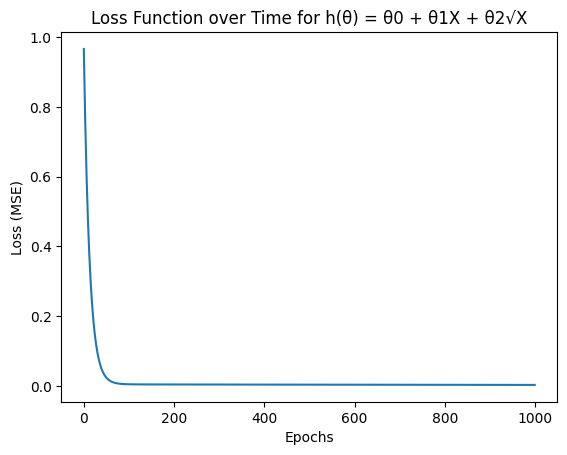

In [5]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss Function over Time for h(θ) = θ0 + θ1X + θ2√X')
plt.show()


In [6]:
print(f"Final theta0: {theta0.item()}, theta1: {theta1.item()}, theta2: {theta2.item()}")

Final theta0: 1.3425929523691593e-07, theta1: 0.5923849940299988, theta2: 0.4089178144931793
